# Combining Two Line Charts in Seaborn and Python

In this tutorial, we will learn how to combine two charts, specifically two line charts in seaborn and python. When we combine two charts, they share a common x-axis while have a different y-axis. Suppose you have two line charts - A and B. When we combine and merge these two line charts into one line chart, they will have a common x-axis. However, the y-axis of the line chart will be on the left and the y-axis of the line chart B will be on the right, or vice versa.

Let us combine two line charts using seaborn in Python. 

## Importing the libraries and dataset

We kick things off by importing the necessary libraries for our tutorial. Next, we will import our dataset. You can find the dataset at this [link](https://data.humdata.org/dataset/world-bank-environment-indicators-for-brazil). Here is a [download link](https://data.humdata.org/dataset/ea282ae3-2994-4278-b0cb-0c19febbf23e/resource/5888ee23-ba24-48f5-b5b0-70d037828b56/download/environment_bra.csv) for the same. The dataset is by the World Bank on Brazil's Environment Indicators.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('environment_bra.csv')
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Brazil,BRA,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.9245334488295
2,Brazil,BRA,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.9887821931674
3,Brazil,BRA,2014,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.9284816956883
4,Brazil,BRA,2013,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.4478723735185


## Simple Exploratory Data Analysis And Data Cleaning

As you can see the first row does not really contain any data. Instead, it specifies what each column contains. This row can be removed. Let us drop the first row and then check the length of the dataframe.

In [3]:
df.drop(index=0, inplace=True)
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Brazil,BRA,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.9245334488295
2,Brazil,BRA,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.9887821931674
3,Brazil,BRA,2014,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.9284816956883
4,Brazil,BRA,2013,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.4478723735185
5,Brazil,BRA,2012,Agricultural land (% of land area),AG.LND.AGRI.ZS,32.9746809696894


In [4]:
len(df)

3342

Next, let us check for any missing values in the dataframe.

In [5]:
df.isna().sum()

Country Name      0
Country ISO3      0
Year              0
Indicator Name    0
Indicator Code    0
Value             0
dtype: int64

Let us get some information on the dataframe using the `.info()` function.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 1 to 3342
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    3342 non-null   object
 1   Country ISO3    3342 non-null   object
 2   Year            3342 non-null   object
 3   Indicator Name  3342 non-null   object
 4   Indicator Code  3342 non-null   object
 5   Value           3342 non-null   object
dtypes: object(6)
memory usage: 182.8+ KB


Hmmm. The `Year` and the `Value` columns are numerical but have their datatype as "object". This may cause some problems for us while doing the visualizations. To be on a safer side, let us convert the `Year` column to int and the `Value` column to float.

In [7]:
df['Value'] = df['Value'].astype(float)
df['Year'] = df['Year'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 1 to 3342
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3342 non-null   object 
 1   Country ISO3    3342 non-null   object 
 2   Year            3342 non-null   int64  
 3   Indicator Name  3342 non-null   object 
 4   Indicator Code  3342 non-null   object 
 5   Value           3342 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 182.8+ KB


Great! Next, let us see all the unique values in the `Indicator Name` column. The `Indicator Name` column contains the name of the environment indicators for which we have the data.

In [8]:
df['Indicator Name'].unique()

array(['Agricultural land (% of land area)',
       'Arable land (% of land area)',
       'Rural land area where elevation is below 5 meters (sq. km)',
       'Rural land area where elevation is below 5 meters (% of total land area)',
       'Urban land area where elevation is below 5 meters (sq. km)',
       'Urban land area where elevation is below 5 meters (% of total land area)',
       'Land area where elevation is below 5 meters (% of total land area)',
       'Forest area (sq. km)', 'Forest area (% of land area)',
       'Average precipitation in depth (mm per year)',
       'Land area (sq. km)', 'Rural land area (sq. km)',
       'Urban land area (sq. km)', 'Surface area (sq. km)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
       'Access to electricity (% of population)',
       'Renewable energy consumption (% of total final energy consumption)',
       'CO2 intensity (k

Wow! That's a lot of information packed in one dataset. 

## Data Visualization

Let us use line charts to map the information for the indicators - 'Agricultural land (% of land area)' and 'Forest area (sq. km)'.

First, let's start with the 'Agricultural land (% of land area)' indicator. We will create a new dataframe which only has the details of this indicator.

In [9]:
agri_land = df[df['Indicator Name'] == 'Agricultural land (% of land area)']
agri_land.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Brazil,BRA,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.924533
2,Brazil,BRA,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.988782
3,Brazil,BRA,2014,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.928482
4,Brazil,BRA,2013,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.447872
5,Brazil,BRA,2012,Agricultural land (% of land area),AG.LND.AGRI.ZS,32.974681


Let us plot a line chart for this using seaborn to see the trend of the increase/decrease in agricultural land in Brazil from 1961 to 2016.

First, we define the figure size. I have defined it as (12, 6). Feel free to use a different figure size. Remember, the format for figure size is (length, height).

Next, we will call the `lineplot()` function from seaborn and specify the x and y axis values and the dataframe.

We use `sns.despine()` to get rid of the top and the right hand side border that comes with the chart.

Lastly, we use `plt.ylabel()` to specify the label of the y-axis and `plt.title()` to specify the title of the line chart.

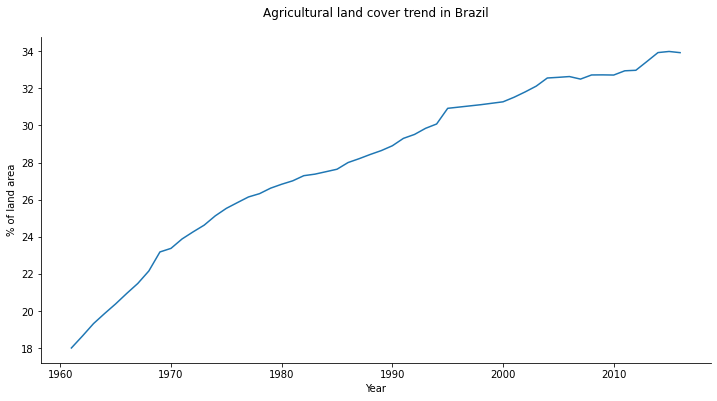

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(x=agri_land['Year'], y=agri_land['Value'], data=agri_land)
sns.despine()
plt.ylabel('% of land area')
plt.title('Agricultural land cover trend in Brazil', pad=20);

Similarly, let us draw a line chart for the 'Forest area (sq. km)' indicator.

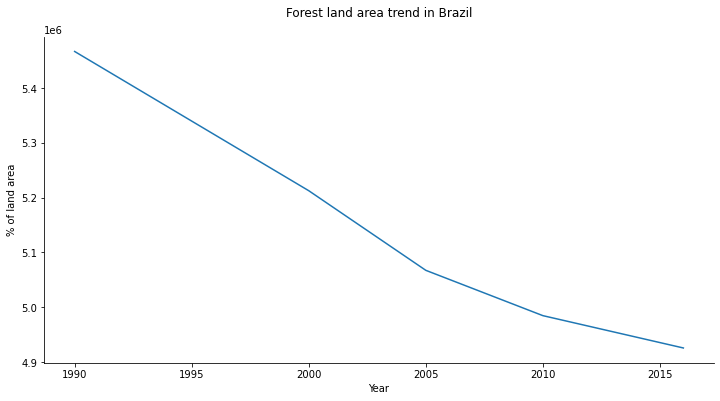

In [11]:
forest_land = df[df['Indicator Name'] == 'Forest area (sq. km)']
forest_land.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(x=forest_land['Year'], y=forest_land['Value'], data=forest_land)
sns.despine()
plt.ylabel('% of land area')
plt.title('Forest land area trend in Brazil', pad=20);

Now let us combine the above plots and try to draw come conclusions from the new combination chart. 

First, we will use the same code that we used to plat the Agricultural Land Cover line chart. We will just add in two more parameters called `label` and `legend` in the seaborn `lineplot()` function.

We will do the same for the Forest Cover chart as well. However, before we write the code for the forest cover line chart, we need to write a code that will help combine these two charts. That line of code is -

`ax2 = ax.twinx()`

The `twinx()` function is a function in the axes module of matplotlib library. It is used to create a twin y-axis that will share the x-axis with the original y-axis. This new y-axis will be on the right side of the chart.

So, in our visualization, the left side y-axis is for the Agricultural land cover while the right side y-axis is for the forest cover line chart.

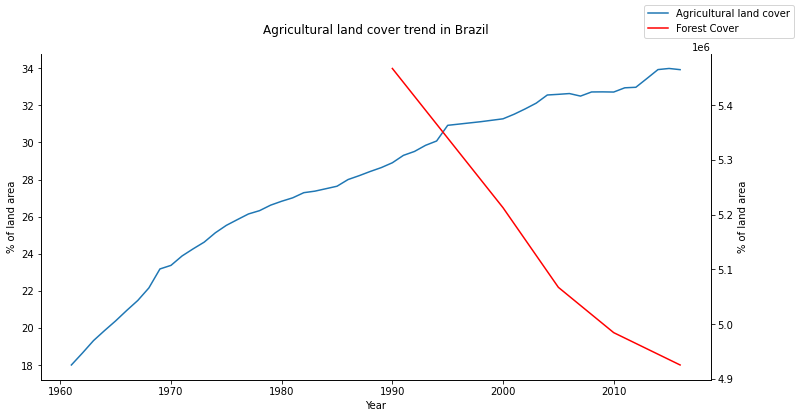

In [12]:
# Line Chart For Agricultural Land Cover
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(x=agri_land['Year'], y=agri_land['Value'], data=agri_land, 
                        label = 'Agricultural land cover', legend=False)
sns.despine()
plt.ylabel('% of land area')
plt.title('Agricultural land cover trend in Brazil', pad=20);

# Line Chart For Forest Cover
ax2 = ax.twinx()
lineplot2 = sns.lineplot(x=forest_land['Year'], y=forest_land['Value'], ax=ax2, color="r", 
                         label ='Forest Cover', legend=False) 
sns.despine(right=False)
plt.ylabel('% of land area')
ax.figure.legend();

With the increase in agricultural land, there was a decrease in the forest covered land. However, this visualization isn't good! As you can see, like the forest cover indicator does not have data before the 1990s. We need to change this visualization so we see the trends from 1990 to 2016. 

This time however, let us write a function that lets you display a single line chart or a combined line chart - according to the parameters you pass.

Let us write the below `quick_line_plot()` function. It takes in 4 arguments - `df1` and `y_label1` which are the compulsory parameters and `df2` and `y_label2` which are optional parameters.

We sort the first dataframe by the values in the `Year` column. Next, we get the maximum and minimum year values and create a list of years using the range function with the step value as 2. This will help set our x-axis scale of the graph as 1 unit = 2 years.

Then we plot the line chart for the first dataframe.

Now, if and only if the second dataframe has been passed into the arguments of the function, we will proceed with turning the above line chart into a combination line chart. 

In [16]:
def quick_line_plot(df1, title, y_label1, df2=None, y_label2=None):
    """
    df1: Dataframe 1
    y_label1: Y axis label for the plot of dataframe 1
    df2: Dataframe 2 (optional)
    y_label2: Y axis label for the plot of dataframe 2 (optional)
    """
    df1 = df1.sort_values(by='Year')
    year_list = df1.Year.unique()
    year_max = year_list[-1]
    year_min = year_list[0]
    x_tick_list = list(range(year_min, year_max, 2))
    Label1 = df1['Indicator Name'][1]
    
    fig, ax = plt.subplots(figsize=(12,6))
    lineplot = sns.lineplot(x=df1['Year'], y=df1['Value'], data=df1, label = Label1, legend=False)
    lineplot.set(xlim=(year_min-1, year_max+1))
    plt.xticks(x_tick_list, rotation =45)  # Rotate the x-axis labels
    sns.despine()
    plt.ylabel(y_label1)
    plt.title(title, pad=20)
    
    if df2 is not None:
        ax2 = ax.twinx()
        Label2 = df2['Indicator Name'][1]
        lineplot2 = sns.lineplot(x=df2['Year'], y=df2['Value'], ax=ax2, color="r", label =Label2, legend=False) 
        sns.despine(right=False)
        plt.ylabel(y_label2)
    ax.figure.legend()

Let us see this function in action. Let us plot the  'Agricultural land (% of land area)' indicator line chart. You'll see that writing this function helped us avoid repeating the code.

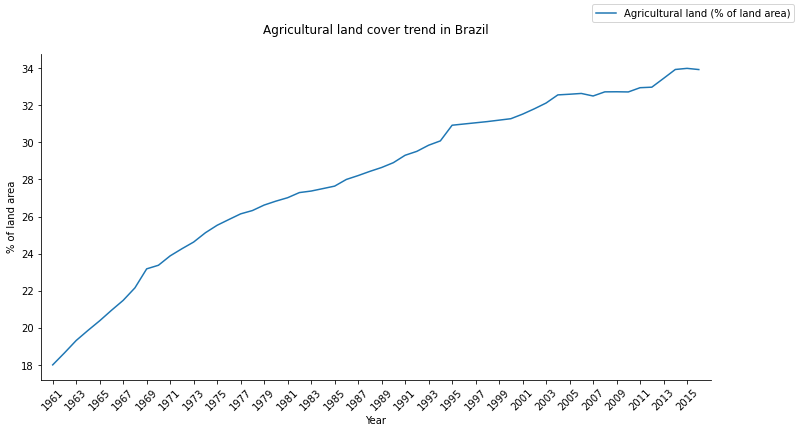

In [21]:
quick_line_plot(agri_land, 'Agricultural land cover trend in Brazil', '% of land area')

Similarly, let us use the `quick_line_plot()` function and plot a line chart for the 'Forest area (sq. km)' indicator.

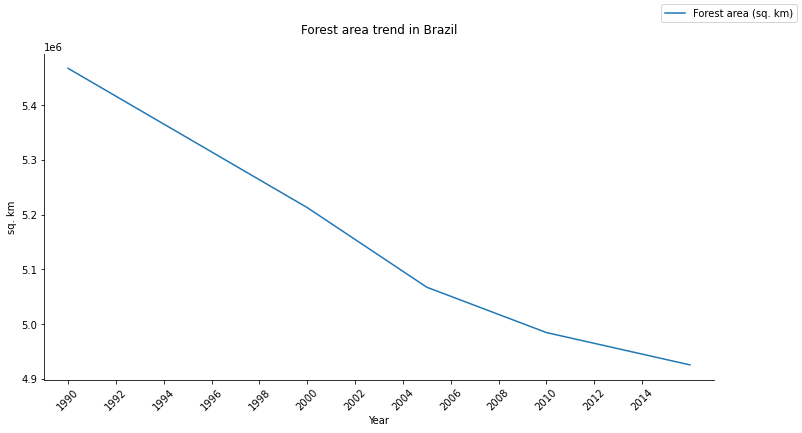

In [23]:
quick_line_plot(forest_land, 'Forest area trend in Brazil', 'sq. km')

Finally, let us make the correct combo line chart of Agricultural land and Forest cover using the `quick_line_plot()` function.

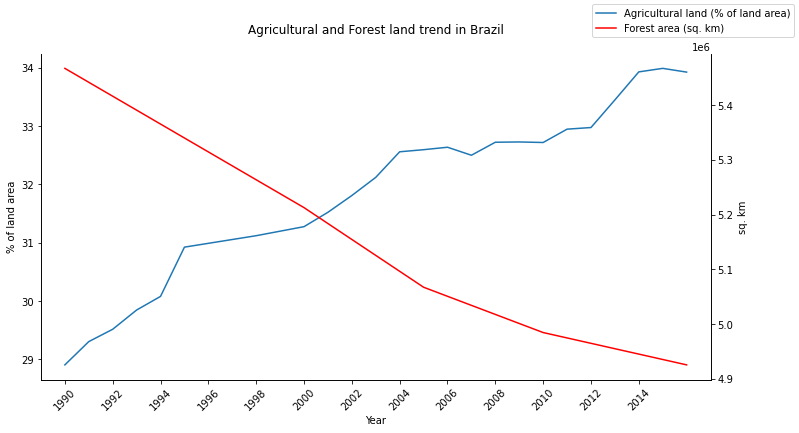

In [24]:
quick_line_plot(agri_land[agri_land.Year >= 1990], 'Agricultural and Forest land trend in Brazil', '% of land area', 
                forest_land, 'sq. km')

Much better! As you can see, we can conclude that there has been a decline in the forest cover with a rise in agriculture land in Brazil through this visualization. 

After looking up about this topic on Google, I found that this was indeed true. 

https://en.wikipedia.org/wiki/Deforestation_in_Brazil#Causes
https://www.reuters.com/article/us-brazil-environment-agriculture-idUSKBN26K00F